# Accessible Volume decorator

## Imports

In [1]:
import IMP
import IMP.core
import IMP.atom
import IMP.algebra
import IMP.bff

## IMP.Model

Create IMP model, root particle, and a root Hierarchy. The AV decorator finds all sampled particles as leaves of a root particle and uses ``IMP.em.SampledDensityMap`` to sample the position of obstacles on a grid. Thus, the Hierarchy is ``IMP.atom.Hierarchy`` and obstacles should have a ``IMP.core.XYZR`` and a ``IMP.atom.Mass`` decorator (For atoms in a biomolecule this is already the case).

In [2]:
m = IMP.Model()
root_p = IMP.Particle(m)
root_hier = IMP.atom.Hierarchy(root_p)

r = 5.0
w = 1.5
xyzs = [
    [[0, 0, 0], 0, w],
    [[0, 5, 0], r, w],
    [[5, 0, 0], r, w],
    [[0, 5, 5], r, w]
]

obstacles = list()
for xyz, r, w in xyzs:
    pi = IMP.Particle(m)
    IMP.atom.Mass.setup_particle(pi, w)
    IMP.core.XYZR.setup_particle(pi, IMP.algebra.Sphere3D(xyz, r))
    root_hier.add_child(IMP.atom.Hierarchy.setup_particle(pi))
    obstacles.append(pi)
        

## IMP.bff.AV decorator
An AV decorated particle has a source particles (usually the attachment site of the label). The IMP.atom.Hierarchy root of the source particle is used to find the obstacles.

In [3]:
source_p = obstacles[0]
av_p = IMP.Particle(m)
av = IMP.bff.AV.setup_particle(m, av_p, source_p)

When the position of particles changes the AV should be resampled.

In [4]:
av.resample()

## Tile feature
The most important attributes of tiles are the penalty and the cost
of visiting a tile (from the starting point). Additionally, a tile
has a density, e.g., used to implement weighted accessible volumes
and a set of other (user-defined) features that are stored in a
dictionary. The density / and path length from the source to a grid point are
accesses by the ``IMP.bff.AV.map`` attribute.

In [5]:
path_map = av.map

In [6]:
bounds = 0.0, 30
tile_penanlty = path_map.get_tile_values(IMP.bff.PM_TILE_PENALTY, (0, 1))
tile_cost = path_map.get_tile_values(IMP.bff.PM_TILE_COST, bounds)
tile_density = path_map.get_tile_values(IMP.bff.PM_TILE_COST_DENSITY, bounds)

/opt/tljh/user/envs/dev/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/opt/tljh/user/envs/dev/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


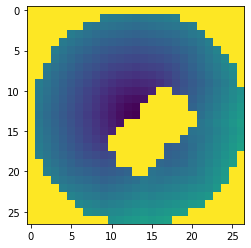

In [7]:
#%%
# These features are returned as 3D arrays.
import pylab as plt
layer = 14
plt.imshow(tile_cost[layer])
plt.show()

In [8]:
import ipyvolume
ipyvolume.quickvolshow(tile_density)

/opt/tljh/user/envs/dev/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/opt/tljh/user/envs/dev/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/opt/tljh/user/envs/dev/lib/python3.9/site-packages/ipyvolume/serialize.py:92: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0] ** 2 + gradient[1] ** 2 + gradient[2] ** 2)


In [9]:
av.has_attribute(IMP.FloatKey("linker_length"))
print(av.get_av_key(0))
print(av.get_is_optimized(IMP.FloatKey("linker_length")))

"linker_length"
False


In [10]:
av.set_av_parameters_are_optimized(True)
print(av.get_is_optimized(IMP.FloatKey("linker_length")))

True


In [11]:
m.get_model_objects()

["rigid bodies list",
 "P5",
 "P4",
 "P2",
 "normalize rigid bodies",
 "P3",
 "P1",
 "P0"]

In [12]:
m.get_attribute(IMP.FloatKey("linker_length"), av)

20.0

In [ ]:
IMP.bff.AVs()